# Info 2950 Project Phase II

Original Research Question:
What is the effect of average BMI, alocohol consumption, hepititis B vaccinations, developing vs. developed countries, and percent expenditure on health on life expectancy?


# Cleaning Data

First, we import our data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
LED = pd.read_csv("Life Expectancy Data.csv")
LED

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Next, we change the column names of our dataset by removing leading or ending spaces, changing them to all lowercase, and replacing any remaining spaces with underscores.

In [2]:
#changing column names
new_colnames = [name.strip() for name in LED.columns]
newer_colnames = [name.lower() for name in new_colnames]
newest_colnames = [name.replace(' ','_') for name in newer_colnames]
LED.columns= newest_colnames
LED.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


To confirm that developed countries have higher life expectancies than developing countries, which we hypothesized, we compared their means using .groupby(). We also looked at adult mortality (per 10,000 adults) to see if there was a difference.

In [3]:
LED.groupby('status').mean()[['life_expectancy']]

,life_expectancy
status,
Developed,79.197852
Developing,67.111465


In [4]:
LED.groupby('status').mean()[['adult_mortality']]

,adult_mortality
status,
Developed,79.685547
Developing,182.833195


To make the dataset easier to work with, we grouped all the different country years together by averaging all the values for each respective country and removing the year column. When doing this, we had to remove the 'status' column for now, as it cannot be averaged as a string. We realized that it would not work to simply add back this column, since there are instances when countries change from developing to developed during the 15 year time period. Thus, we plan on developing a more advanced algorithm later to address status when we explore our research questions.

In [5]:
without_year= LED.groupby('country').mean()
without_year= without_year.drop(columns = ["year"])
without_year.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


# Measuring Correlations

To confirm which variables we want to further explore, we want to see how they correlate to life expectancy. Thus, we loop through all the variables in the data frame, measuring their correlation to life expectancy. The significant correlations (greater than 0.5 or less than -0.5), are printed below. Obviously, the correlations for life_expectancy and adult_mortality are high, so we disregard those.

In [6]:
for x in without_year.columns:
    expec = without_year['life_expectancy'].corr(without_year[x])
    if expec > 0.50 or expec < -0.50:
        print(f'The correlation between life expectancy and {x} is {expec:0.2F}.')

The correlation between life expectancy and life_expectancy is 1.00.
The correlation between life expectancy and adult_mortality is -0.90.
The correlation between life expectancy and percentage_expenditure is 0.52.
The correlation between life expectancy and bmi is 0.72.
The correlation between life expectancy and polio is 0.68.
The correlation between life expectancy and diphtheria is 0.67.
The correlation between life expectancy and hiv/aids is -0.59.
The correlation between life expectancy and gdp is 0.61.
The correlation between life expectancy and thinness__1-19_years is -0.52.
The correlation between life expectancy and thinness_5-9_years is -0.52.
The correlation between life expectancy and income_composition_of_resources is 0.82.
The correlation between life expectancy and schooling is 0.79.


Some of the interesting high correlations here are BMI, income compostiion of resources, and schooling.

After seeing which variables have higher correlations to life expectancy, we want to also see if different variables correlate more to infant deaths. Thus, we repeat the same for-loop process for infant deaths.

In [8]:
for x in without_year.columns:
    expec = without_year['infant_deaths'].corr(without_year[x])
    if expec > 0.50 or expec < -0.50:
        print(f'The correlation between infant deaths and {x} is {expec:0.2F}.')

The correlation between infant deaths and infant_deaths is 1.00.
The correlation between infant deaths and measles is 0.71.
The correlation between infant deaths and under-five_deaths is 1.00.
The correlation between infant deaths and population is 0.91.
The correlation between infant deaths and thinness__1-19_years is 0.51.
The correlation between infant deaths and thinness_5-9_years is 0.51.


The correlations to infant deaths, under-five deaths, and thinness appear to not be relevant, so we are most interested in the high correlation of infant deaths with measles and population.

After noticing that infant deaths had different variables with high correlation than life expectancy, we decided to also test correlations with adult mortality. 

In [9]:
for x in without_year.columns:
    expec = without_year['adult_mortality'].corr(without_year[x])
    if expec > 0.50 or expec < -0.50:
        print(f'The correlation between adult mortality and {x} is {expec:0.2F}.')

The correlation between adult mortality and life_expectancy is -0.90.
The correlation between adult mortality and adult_mortality is 1.00.
The correlation between adult mortality and bmi is -0.62.
The correlation between adult mortality and polio is -0.53.
The correlation between adult mortality and diphtheria is -0.51.
The correlation between adult mortality and hiv/aids is 0.70.
The correlation between adult mortality and gdp is -0.51.
The correlation between adult mortality and income_composition_of_resources is -0.65.
The correlation between adult mortality and schooling is -0.61.


Looping through the same algorithm with adult mortality, there seems to be similarities to the correlations of life expectancy. One specifically high correlation for adult mortality is HIV/AIDs, which makes sense.

# Exploring High Correlations with Scatter Plots

To further explore some of the eye-catching high-correlated variables, we construct a few scatter plots.

Text(0.5, 1.0, 'Life Expentacy vs. BMI')

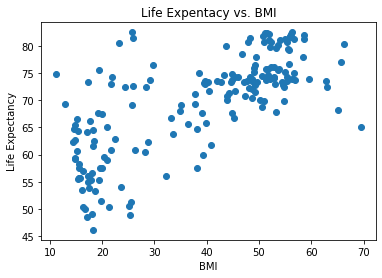

In [10]:
plt.scatter(without_year.bmi, without_year.life_expectancy)
plt.ylabel('Life Expectancy')
plt.xlabel('BMI')
plt.title('Life Expentacy vs. BMI')

As seen by the scatter plot, life expectancy and BMI has an interesting distribution, so BMI is certainly a variable we would like to explore more.

Text(0.5, 1.0, 'Life Expentacy vs. Income Composotion of Resources')

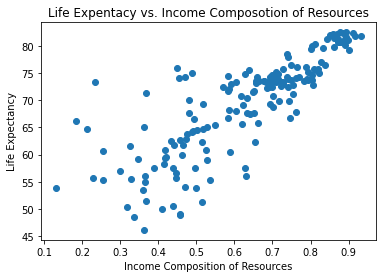

In [11]:
plt.scatter(without_year.income_composition_of_resources, without_year.life_expectancy)
plt.ylabel('Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.title('Life Expentacy vs. Income Composotion of Resources')

For life expectancy versus income composition of resources, the distribution is fairly linear, which shows great promise for measuring other correlations and statistics in the future.

Text(0.5, 1.0, 'Infant Deaths vs. Measles')

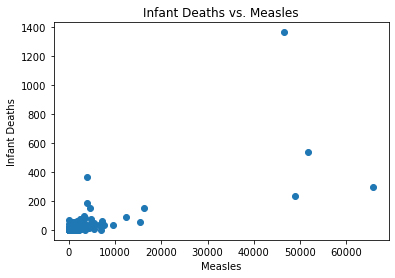

In [12]:
plt.scatter(without_year.measles, without_year.infant_deaths)
plt.ylabel('Infant Deaths')
plt.xlabel('Measles')
plt.title('Infant Deaths vs. Measles')

When looking at the scatter plot of infant deaths and measles, it is clear why there is a high correlation, but the distribution is not too insightful. A few outliers with high measles have higher infant deaths, but that is only for four countries. After looking at this scatterplot, it is evident that infant deaths may not have much depth in further exploration.

Text(0.5, 1.0, 'Adult Mortality vs. HIV/AIDs')

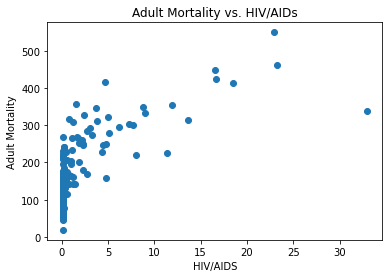

In [13]:
plt.scatter(without_year['hiv/aids'], without_year.adult_mortality)
plt.ylabel('Adult Mortality')
plt.xlabel('HIV/AIDS')
plt.title('Adult Mortality vs. HIV/AIDs')

Lastly, this scatterplot showing HIV/AIDs versus adult mortality has a very interesting distribution. Countries with little to no HIV/AIDs vary greatly with adult mortality, but countries with significant amounts of HIV/AIDs tend to only have higher adult mortality rates. 

 # Conclusion from Summary Statistics and Plots
 
Based off the correlations and scatter plots we have produced, we realize that many of our original variables and hypotheses are not as correlated as expected. However, we see that HIV/AIDs, Income Composition of Resources, and BMI are all deep and well-correlated with adult mortality, life expectancy, and infant deaths. Additionally, schooling has a high correlation to life expectancy. Furthermore, financial topics like income composition of resources and GDP also have high correlations with adult mortality and life expectancy. Thus, we think that exploring more topics related to education and government spending can be interesting to compare with life-expectancy and health. To add, we also calculated that developing countries and developed countries have significantly different life expectancies, so status is another variable we want to look more into. Moving forward, we will change our research questions to:

1. How does average education level of a country affect the countries holistic health?
2. How does government spending play into life expectancy in developing countries?

This one dataset was helpful in developing our research questions, but we plan on incorporating more data from different sources to further explore these topics. Specifically, exploring education in regions of one country and varying government expenditures in different countries can add to this data exploration.

# Data Description Questions

**What are the observations (rows) and the attributes (columns)?**

The rows of the data set are countries and the columns of the data set are: country (country name), year (year this data was collected), status (developed or developing country), life_expectancy (average life expectancy in age), adult_mortality (probability of dying between 15 and 60 years per 1000 population), infant_deaths (number of infant deaths per 1000 population), alcohol (alcohol consumption recorded per capita (in litres of pure alcohol)), percent_expenditure (expenditure on health as a percentage of GDP per capita), hepitatis_b (Hepatitis B immunization coverage among 1-year-olds as a percentage), measles (number of reported cases per 1000 population), BMI (average Body Mass Index), under_five_deaths (number of under-five deaths per 1000 population), polio (Polio immunization coverage among 1-year-olds as a percentage), total_expenditure (general government expenditure on health as a percentage of total government expenditure), diphtheria (diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds as a percentage), hiv/aids (deaths per 1000 live births (0-4 years)), gdp (Gross Domestic Product per capita (in USD)), population, thinness__1-19_years (prevalence of thinness among children and adolescents for ages 10 to 19 as a percentage), thinness_5-9_years (prevalence of thinness among children for age 5 to 9 as a percentage), income_composition_of_resources (Human Development Index in terms of income composition of resources (index ranging from 0 to 1)), schooling (average number of years of schooling).

**Why was this data set created?**

Both the Global Health Observatory (GHO) data repository under the World Health Organization (WHO) and the United Nations track health statistics as well as many other related factors (economic, social, etc.) for all countries. The creators of this data set combined the data from the repository with that of the UN. They observed that in the past 15 years, there have been significant developments in the health sector specifically in terms of decreasing human mortality rates. They created this data set to compare this decreasing mortality rate to a number of other economic, social, and medical factors to analyze how they contribute.

**Who funded the creation of the data set?**

This project was funded by the Industrial Engineering Department at Georgia Institute of Technology.

**What processes might have influenced what data was observed and recorded and what was not?**

In terms of the WHO collecting data, it is possible that more developed countries have more resources and are thus more likely to have more data. With this said, in order to compare each country equitably, the data collectors must collect the same data across all countries. This means that it is possible that the data collection was limited by what data variables were available across every country.

In terms of the creation of the actual data set, the creators mentioned a few factors they used to limit the data set:
    The creators of this data set noted that there were certain countries originally in this data set that had lots of missing data (they noted lesser known countries like Vanuatu, Tonga, Togo, Cabo Verde etc.). They shared that finding the data for these countries was difficult, so they decided to exclude the countries from the final data set of 193 countries. 
    The creators also noted that “among all categories of health-related factors only those critical factors were chosen which are more representative”. This means that they omitted other factors that they deemed less important or less correlated to the data set.

How they data cleaned: Of all health related categories in the WHO data set, only the critical factors (those with high correlations to mortality rates) were chosen to be included. The creators combined these data sets for the years 2000-2015 for 193 countries using the merge function. To account for the missing values, the developers handled it in R software by using the Missmap command.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The preprocessing done by the creators of the data set are outlined in two questions above. The preprocessing we did was outlined throughout the jupyter notebook; however, to summarize, we renamed the column names by removing leading or ending spaces, changing them to all lowercase, and replacing any remaining spaces with underscores. We also grouped and averaged all of the data for each country for all the years. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

The WHO notes that all of their data sets "represent the best estimates using methodologies for specific indicators that aim for comparability across countries and time; they are updated as more recent or revised data become available, or when there are changes to the methodology being used". The people involved in the data collection are aware of their data being collected and understand the WHOs intent to utilize their data to analyze global health trends to serve the greater health of humanity.

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

https://drive.google.com/file/d/1uWotsPMAGiU_x2lEgssgJe6DtITk4r1I/view?usp=sharing 

**List specific questions for your peer reviewers and project mentor to answer in giving you feedback on this phase:**

Are there too many or too few variables (columns) being evaluated?
Are our research questions too broad or too narrow?